In [199]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [200]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [201]:
NUM_CLASSES = 17

# Dataset reading

In [202]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [203]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [205]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [206]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_18 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 17)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,257 (4.91 KB)

 Trainable params: 1,257 (4.91 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [208]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [209]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0469 - loss: 2.8813
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0602 - loss: 2.8268 - val_accuracy: 0.2400 - val_loss: 2.7082
Epoch 2/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1328 - loss: 2.7395
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1411 - loss: 2.6816 - val_accuracy: 0.2571 - val_loss: 2.5856
Epoch 3/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2344 - loss: 2.5894
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2295 - loss: 2.5640 - val_accuracy: 0.4171 - val_loss: 2.4466
Epoch 4/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2969 - loss: 2.4869
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [210]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0650 


In [211]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [212]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[3.4720085e-20 1.8763263e-20 1.0881727e-29 4.4292099e-28 1.5497130e-12
 9.9999988e-01 8.8077885e-30 3.0527264e-08 7.0842154e-10 7.5971381e-14
 2.0461830e-16 3.6963206e-09 2.4577296e-16 3.6493800e-19 7.5639775e-08
 7.5589977e-24 2.8605359e-25]
5


# Confusion matrix

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


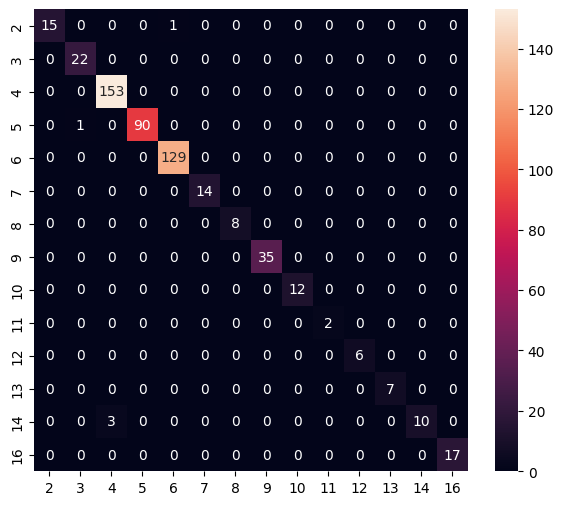

Classification Report
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        16
           3       0.96      1.00      0.98        22
           4       0.98      1.00      0.99       153
           5       1.00      0.99      0.99        91
           6       0.99      1.00      1.00       129
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      0.77      0.87        13
          16       1.00      1.00      1.00        17

    accuracy                           0.99       525
   macro avg       0.99      0.98      0.99       525
weighted avg       0.99      0.99      0.99       525



In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [214]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [215]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\shafe\AppData\Local\Temp\tmpr9qltaxm\assets


INFO:tensorflow:Assets written to: C:\Users\shafe\AppData\Local\Temp\tmpr9qltaxm\assets


Saved artifact at 'C:\Users\shafe\AppData\Local\Temp\tmpr9qltaxm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2087336836752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2087336823120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2087336836176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2087336824080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2087336836944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2087336824464: TensorSpec(shape=(), dtype=tf.resource, name=None)


7128

# Inference test

In [216]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [217]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [218]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [219]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [220]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4720212e-20 1.8763261e-20 1.0881807e-29 4.4292094e-28 1.5497128e-12
 9.9999988e-01 8.8077870e-30 3.0527321e-08 7.0842154e-10 7.5971517e-14
 2.0461907e-16 3.6963275e-09 2.4577294e-16 3.6494076e-19 7.5639910e-08
 7.5590253e-24 2.8605354e-25]
5
